# ACCESOS A TECNOLOGIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale

In [2]:
def crear_df(nombre: str):
    df = pd.read_excel(r"D:\Denise_Estudio\henry\PI2\Internet.xlsx", sheet_name= nombre)
    return df

Tengo los siguientes datos en las hojas:

5) Accesos_tecnologia_localidad: Incluye los accesos a internet por tecnología en diferentes localidades.
6) Totales Accesos Por Tecnología: Muestra los totales de accesos a internet desglosados por cada tipo de tecnología.
7) Accesos Por Tecnología: Detalla los accesos a internet por tecnología en diferentes provincias.
8) Dial-BAf: Presenta los datos de accesos dial-up y Banda Ancha Fija.
9) Totales Dial-BAf: Muestra los totales de accesos dial-up y Banda Ancha Fija.

In [3]:
df_acc_tec_localidad = crear_df('Accesos_tecnologia_localidad')
df_acc_x_tecnología = crear_df('Accesos Por Tecnología')
df_total_acc_x_tec = crear_df('Totales Accesos Por Tecnología')

Comienzo a analizar los df

In [4]:
df_acc_tec_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7242,0,0,0,0,7242
3072,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3073,TUCUMAN,Trancas,Villa de Trancas,90112030,102,0,0,0,33,0,0,71,206
3074,TUCUMAN,Yerba Buena,Villa Carmela,90119020,831,0,0,0,1,0,0,79,911


Este dataframe tiene informacion a cerca de las diferentes tecnologias y su acceso medido por localidades

In [5]:
df_acc_x_tecnología

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
959,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos notar un aviso: 'Los datos provinciales no coinciden a nivel nacional, ya que se incorporó información que no contiene apertuta a nivel geográfico.'

In [6]:
df_acc_x_tecnología.iloc[961]


Año                                                             *
Trimestre       Los datos provinciales no coinciden a nivel na...
Provincia                                                     NaN
ADSL                                                          NaN
Cablemodem                                                    NaN
Fibra óptica                                                  NaN
Wireless                                                      NaN
Otros                                                         NaN
Total                                                         NaN
Name: 961, dtype: object

Borro columnas 960 y 961

In [8]:
df_acc_x_tecnología.drop(960, inplace=True)
df_acc_x_tecnología.drop(961, inplace=True)

In [9]:
df_acc_x_tecnología.shape

(960, 9)

Trabajo los nulos

In [10]:
df_acc_x_tecnología.isna().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Decido reemplazar nulos por valores 0


In [ ]:
df_acc_x_tecnología.fillna(0, inplace=True)

In [22]:
# Convertir las columnas a numérico, coaccionando los errores a NaN
df_acc_x_tecnología['ADSL'] = pd.to_numeric(df_acc_x_tecnología['ADSL'], errors='coerce')
df_acc_x_tecnología['Cablemodem'] = pd.to_numeric(df_acc_x_tecnología['Cablemodem'], errors='coerce')
df_acc_x_tecnología['Fibra óptica'] = pd.to_numeric(df_acc_x_tecnología['Fibra óptica'], errors='coerce')
df_acc_x_tecnología['Año'] = pd.to_numeric(df_acc_x_tecnología['Año'], errors='coerce')

In [23]:
df_acc_x_tecnología.isna().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Busco outliers

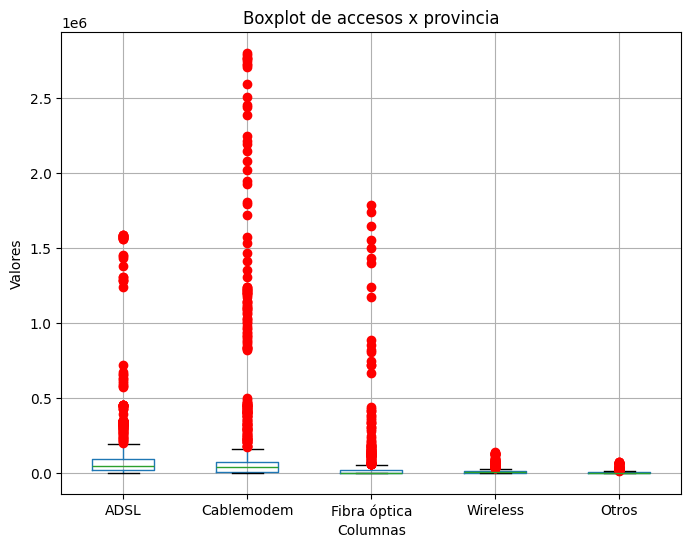

In [24]:
plt.figure(figsize=(8,6))
df_acc_x_tecnología.boxplot(column=['ADSL', 'Cablemodem','Fibra óptica','Wireless','Otros'], sym='ro')
plt.title('Boxplot de accesos x provincia')
plt.xlabel('Columnas')
plt.ylabel('Valores')

plt.show()

In [27]:
df_acc_x_tecnología

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,223391.0,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,58700.0,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,6669.0,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,14000.0,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,26306.0,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
955,18927.0,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
956,322662.0,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
957,32567.0,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,21618.0,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


Existen muchos outliers en ADLS, Cablemodem, Fibra Optica Columnas

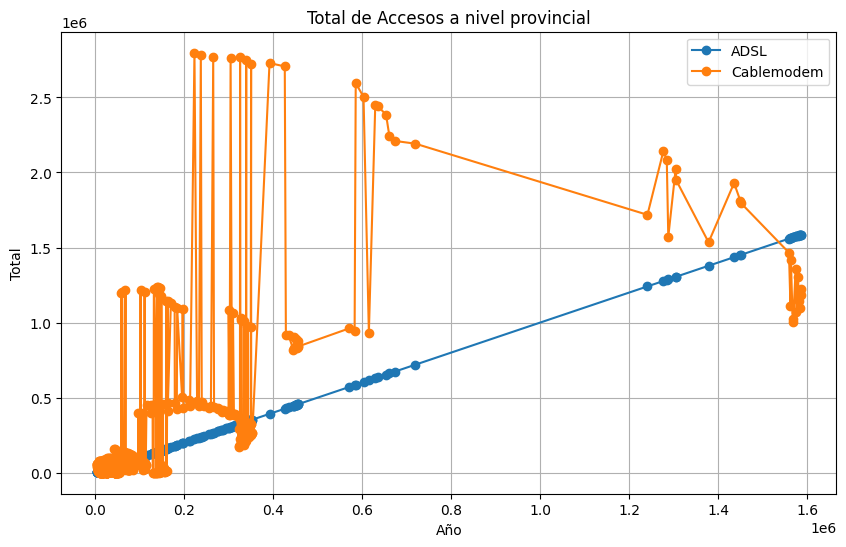

In [28]:
promedio_por_anio = df_acc_x_tecnología.groupby('Año').agg({'ADSL': 'mean', 'Cablemodem': 'mean','Fibra óptica': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio ['ADSL'], label='ADSL', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Cablemodem'], label='Cablemodem', marker='o')
#plt.plot(promedio_por_anio.index, promedio_por_anio['Fibra óptica'], label='Fibra óptica', marker='o')

plt.title('Total de Accesos a nivel provincial')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_total_acc_x_tec

Este dataframe posee datos a nivelnacional